In [1]:
from math import cos
from matplotlib import pyplot as plt 
import numpy as np
import sympy as sp
import functools as ft
import seaborn as sns
import pandas as pd

In [2]:
def power(k, T1, r1, r2, L):
    R1, R2 = r1**2, r2**2
    numerator=T1
    denominator=1+R1*R2-2*r1*r2*cos(2*k*L)
    return numerator/denominator

def FP(k, L, T):
    r1, t1=np.sqrt(1-T[0]), 1j*np.sqrt(T[0])
    r2, t2=np.sqrt(1-T[1]), 1j*np.sqrt(T[1])

    numerator=-t1*t2*np.exp(-1j*k*L)
    denominator=1-r1*r2*np.exp(-2j*k*L)
    return numerator/denominator


def r_t(T):
    #return np.sqrt(1-T), np.sqrt(T)
    return np.sqrt(1-T), 1j*np.sqrt(T) 

def mirror(r,t):
    #return np.array([[-1,r],[-r,r**2+t**2]])*(1j/t)
    return np.array([[-1,r],[-r,r**2-t**2]])*(1j/t)

def space(k,L):
    return np.array([[np.exp(1j*k*L),0],[0,np.exp(-1.0j*k*L)]])

def tr_func(k, L, T):
    cav_matrix=ft.reduce(np.dot,[mirror(*r_t(T[i//2])) if i%2==0 else space(k,L[i//2]) for i in range(0,2*len(L)+1)])
    trans=1/cav_matrix[0][0]
    reflec=cav_matrix[1][0]/cav_matrix[0][0]
    return trans, reflec

def TM_form(k,L,T):
    l1, l2= L[0], L[1]
    r1, t1=r_t(T[0])
    r2, t2= r_t(T[1])
    r3, t3= r_t(T[2])
    
    numerator=t1*t2*t3*np.exp(1j*k*(2*l1+l2))
    denominator= 1j*((r1-r2*np.exp(2j*l1*k))*r3*np.exp(1j*l1*k)-(r1*r2-np.exp(2j*l1*k))*np.exp(1j*k*(l1+2*l2)))
    
    return numerator/denominator

#k=2pi/lambda=w/c
#w=2pi*c/lambda

# Transmission function of the Fabry-Perot and Three mirror cavity

In [12]:
freq=np.arange(1.2,1.3,0.0001)
#freq=np.arange(0,20,0.0001) #to compare with the sympy code
fp=FP(freq,5,[0.02,0.02]) #control FP cavity 
TM_t=[tr_func(f,[0.05, 5],[0.02, 0.02, 0.02])[0] for f in freq] #n cavities formula 2, for 3 mirrors
TM_r=[tr_func(f,[0.05, 5],[0.02, 0.02, 0.02])[1] for f in freq]

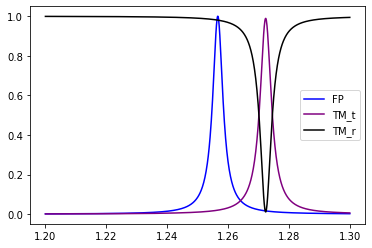

In [13]:
plt.plot(freq,np.abs(fp)**2,color='blue', label='FP')
plt.plot(freq, np.abs(TM_t)**2,color='purple', label='TM_t')
plt.plot(freq, np.abs(TM_r)**2,color='black', label='TM_r')
plt.legend()

# Heatmap

In [5]:
c=299792458 # units: m/s
#lamb=1.064e-6 #wavelength in meter
lengths=np.arange(1e-2,1e-2+2e-6,1e-8) # units: m
lamb=np.arange(1e-6,1.000001e-6,1e-15) # units: m  #1.064 microns usual wavelength 
#freq=c/lamb # units: 1/s
freq=np.arange(1.2,1.3,0.0001) 
afreq=2*np.pi*c/lamb 

<AxesSubplot:>

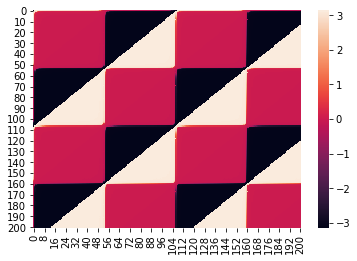

In [6]:
grid=[[np.angle(tr_func(2*np.pi/1.064e-6, [x, y], [0.02, 0.02, 0.02])[0]) for y in lengths] for x in lengths]
mat=pd.DataFrame(grid)
sns.heatmap(mat)

<ipython-input-7-4da9d5f784be>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(afreq,lengths,mat.T)


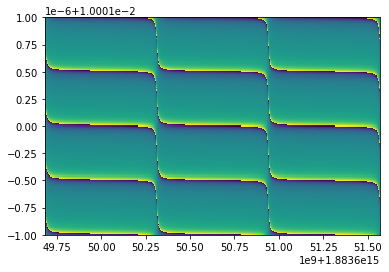

In [7]:
grid=[[np.angle(tr_func(y/c, [x, 1.5], [0.5, 0.1, 1e-8])[1]) for x in lengths] for y in afreq]
mat=pd.DataFrame(grid)
plt.pcolor(afreq,lengths,mat.T)    

<ipython-input-2-01dd21f389e1>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([[np.exp(1j*k*L),0],[0,np.exp(-1.0j*k*L)]])
<ipython-input-2-01dd21f389e1>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([[np.exp(1j*k*L),0],[0,np.exp(-1.0j*k*L)]])


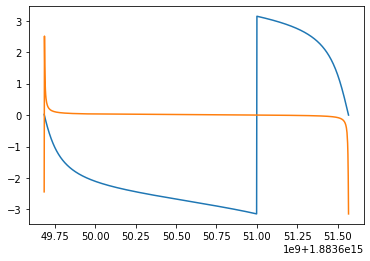

In [8]:
plt.plot(afreq ,np.angle(tr_func(afreq/c, [-0.5e-6 + 1.0001e-2, 0.5], [0.5, 0.1, 1e-8])[1]))
plt.plot(afreq ,np.angle(tr_func(afreq/c, [0.25e-6 + 1.0001e-2, 0.5], [0.5, 0.1, 1e-8])[1]))

# 2*l2=N*lambda,  